In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

This endpoint contains school-level information on location, mailing addresses, school types, highest and lowest grades offered, and free and reduced-price lunch. This endpoint also contains the school-level data on the number of full-time eqivalent teachers.
Source: The National Center for Education Statistics’ Common Core of Data (CCD)

In [70]:
ccd_directory = pd.read_csv("schools_ccd_directory.csv")
ccd_directory.head()


/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_2792/765215910.py:1: DtypeWarning: Columns (7,8,9,11,12,13,14,15,17,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  ccd_directory = pd.read_csv("schools_ccd_directory.csv")


,year,ncessch,ncessch_num,school_id,school_name,leaid,lea_name,state_leaid,seasch,street_mailing,...,direct_certification,enrollment,ungrade_cedp,elem_cedp,middle_cedp,high_cedp,lunch_program,congress_district_id,state_leg_district_lower,state_leg_district_upper
0,1986,10000201704,10000201704,1704.0,CHALKVILLE CAMPUS,100002.0,DEPARTMENT OF YOUTH SERVICES,210,0020,NaN,...,NaN,129.0,0,0,1,1,NaN,NaN,NaN,NaN
1,1986,10000201705,10000201705,1705.0,MT MEIGS CAMPUS,100002.0,DEPARTMENT OF YOUTH SERVICES,210,0030,NaN,...,NaN,193.0,0,0,1,1,NaN,NaN,NaN,NaN
2,1986,10000201706,10000201706,1706.0,VACCA CAMPUS,100002.0,DEPARTMENT OF YOUTH SERVICES,210,0040,NaN,...,NaN,162.0,0,0,1,1,NaN,NaN,NaN,NaN
3,1986,10000500870,10000500870,870.0,ALABAMA AVE MIDDLE SCH,100005.0,ALBERTVILLE CITY BOARD,101,0010,NaN,...,NaN,845.0,0,0,1,0,NaN,NaN,NaN,NaN
4,1986,10000500871,10000500871,871.0,ALBERTVILLE HIGH SCH,100005.0,ALBERTVILLE CITY BOARD,101,0020,NaN,...,NaN,1025.0,0,0,0,1,NaN,NaN,NaN,NaN


In [78]:
len(ccd_directory)

3381565

This endpoint contains student membership data for each school by grade. Only operational schools serving one or more grades are required to report membership and only these are included in this endpoint. Source: The Civil Rights Data Collection (CRDC)



In [71]:
crdc_directory = pd.read_csv("schools_crdc_school_characteristics.csv")
crdc_directory.head()

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_2792/3852495690.py:1: DtypeWarning: Columns (0,2,3,34) have mixed types. Specify dtype option on import or set low_memory=False.
  crdc_directory = pd.read_csv("schools_crdc_school_characteristics.csv")


,crdc_id,year,ncessch,leaid_crdc,fips,school_name_crdc,schoolid_crdc,lea_name,lea_state,prek,...,charter_crdc,magnet_crdc,entire_school_magnet,alt_school,alt_school_focus,ability_grouped_math_or_eng,ug_elementary_school,ug_middle_school,ug_high_school,leaid
0,10000201705,2011,10000201705.0,100002,1,WALLACE SCH - MT MEIGS CAMPUS,1705,ALABAMA YOUTH SERVICES,AL,0,...,0,0,-2,0,-2.0,0.0,NaN,NaN,NaN,100002.0
1,10000201705,2013,10000201705.0,100002,1,WALLACE SCH - MT MEIGS CAMPUS,1705,ALABAMA YOUTH SERVICES,AL,0,...,0,0,-2,1,3.0,NaN,-2.0,-2.0,-2.0,100002.0
2,10000201705,2015,10000201705.0,100002,1,Wallace Sch - Mt Meigs Campus,1705,Alabama Youth Services,AL,0,...,0,0,-2,0,-2.0,NaN,0.0,0.0,1.0,100002.0
3,10000201705,2017,10000201705.0,100002,1,Wallace Sch - Mt Meigs Campus,1705,Alabama Youth Services,AL,0,...,0,0,-2,0,-2.0,NaN,-2.0,-2.0,-2.0,100002.0
4,10000201706,2011,10000201706.0,100002,1,MCNEEL SCH - VACCA CAMPUS,1706,ALABAMA YOUTH SERVICES,AL,0,...,0,0,-2,0,-2.0,0.0,NaN,NaN,NaN,100002.0


In [77]:
len(crdc_directory)

385134

In [ ]:
#The two directories are from two different sources.We need to merge the two datasets. 
ccd_crdc_directory = pd.merge(crdc_directory,ccd_directory, on = "year")
ccd_crdc_directory

<AxesSubplot:>

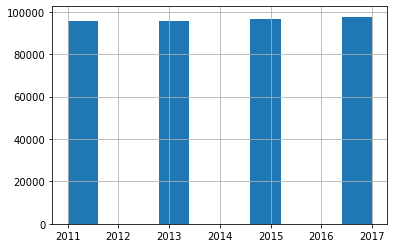

In [84]:
ccd_crdc_directory[1].hist()

In [8]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/ccd/enrollment/2014/grade-8/"
response = urlopen(url)
ccd_enrolment = loads(response.read())

In [10]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/enrollment/2013/race/sex/"
response = urlopen(url)
crdc_enrolment = loads(response.read())

In [11]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/discipline/2013/disability/sex/"
response = urlopen(url)
crdc_dicipline = loads(response.read())

In [12]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/harassment-or-bullying/2015/allegations/"
response = urlopen(url)
crdc_harassment = loads(response.read())

In [13]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/chronic-absenteeism/2013/race/sex/"
response = urlopen(url)
crdc_absenteeism = loads(response.read())

In [14]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/restraint-and-seclusion/2015/instances/"
response = urlopen(url)
crdc_restraint = loads(response.read())

In [15]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/ap-ib-enrollment/2013/race/sex/"
response = urlopen(url)
crdc_ap_enrolment = loads(response.read())

In [16]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/ap-exams/2013/race/sex/"
response = urlopen(url)
crdc_ap_exam = loads(response.read())

In [17]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/sat-act-participation/2013/race/sex/"
response = urlopen(url)
crdc_sat_participation = loads(response.read())

In [18]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/teachers-staff/2015/"
response = urlopen(url)
crdc_teachers = loads(response.read())

In [20]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/math-and-science/2017/race/sex/"
response = urlopen(url)
crdc_mathscience_enrollment = loads(response.read())

In [21]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/algebra1/2017/race/sex/"
response = urlopen(url)
crdc_algebra = loads(response.read())


In [22]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/dual-enrollment/2017/race/sex"
response = urlopen(url)
crdc_dual_enrollment = loads(response.read())

In [23]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/suspensions-days/2017/race/sex"
response = urlopen(url)
crdc_suspensions = loads(response.read())

In [24]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/offerings/2017/"
response = urlopen(url)
crdc_offerings = loads(response.read())

In [25]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/school-finance/2017/"
response = urlopen(url)
crdc_school_finance = loads(response.read())

In [26]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/crdc/retention/2017/grade-3/race/sex"
response = urlopen(url)
crdc_retention = loads(response.read())

In [28]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/edfacts/assessments/2014/grade-8/"
response = urlopen(url)
edfact_assessment = loads(response.read())


In [29]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/edfacts/grad-rates/2014/"
response = urlopen(url)
edfact_grad_rate = loads(response.read())

In [30]:
from urllib.request import urlopen
from json import loads
url = "https://educationdata.urban.org/api/v1/schools/nhgis/census-2010/2016/"
response = urlopen(url)
nhgis_geografy = loads(response.read())